In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [21]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding = 'latin1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [22]:
pd.crosstab(data['Late_delivery_risk'],data['Type'])

Type,CASH,DEBIT,PAYMENT,TRANSFER
Late_delivery_risk,,,,
0,8507,29646,17721,25668
1,11109,39649,24004,24215


In [23]:
pd.crosstab(data['Late_delivery_risk'],data['Days for shipping (real)'])

Days for shipping (real),0,1,2,3,4,5,6
Late_delivery_risk,,,,,,,
0,5080,203,30105,22006,21754,1160,1234
1,0,4454,26513,6759,6759,27003,27489


In [24]:
num_cols = data.select_dtypes(include = ['int64','float64']).columns
print(num_cols)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')


In [25]:
for i in data.columns:
  print(i,data[i].nunique())

Type 4
Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Delivery Status 4
Late_delivery_risk 2
Category Id 51
Category Name 50
Customer City 563
Customer Country 2
Customer Email 1
Customer Fname 782
Customer Id 20652
Customer Lname 1109
Customer Password 1
Customer Segment 3
Customer State 46
Customer Street 7458
Customer Zipcode 995
Department Id 11
Department Name 11
Latitude 11250
Longitude 4487
Market 5
Order City 3597
Order Country 164
Order Customer Id 20652
order date (DateOrders) 65752
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Region 23
Order State 1089
Order Status 9
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Image 118
Product Name 118
Product Price 75
Prod

In [26]:
cat_low_cardinality = [i for i in data.select_dtypes(include = ["object"]).columns if data[i].nunique() < 50]

In [9]:
cat_low_cardinality

['Type',
 'Delivery Status',
 'Customer Country',
 'Customer Email',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order Region',
 'Order Status',
 'Shipping Mode']

In [12]:
corr_mat = data[num_cols].corr()

In [13]:
corr_mat

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000112,-0.001631,-0.004073,...,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003019,-0.000262,-0.005300,...,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002235,0.031442,0.000338,...,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001304,0.232367,-0.000223,...,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003148,0.001077,0.000679,...,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002898,0.888835,0.002195,...,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.002022,0.136897,0.002335,...,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,-0.001304,0.003148,0.002898,0.002022,1.000000,0.002878,0.584553,...,-0.006174,-0.001490,-0.001304,0.002235,0.011843,0.003173,0.002898,NaN,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002878,1.000000,0.002460,...,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584553,0.002460,1.000000,...,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


In [15]:
strong_corr = corr_mat[(corr_mat > 0.3) | (corr_mat < -0.3)]
strong_corr

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,NaN,NaN,0.401415,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipment (scheduled),0.515880,1.000000,NaN,NaN,-0.369352,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefit per order,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Sales per customer,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.989744,1.000000,NaN,NaN,NaN,NaN,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category Id,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.888835,NaN,...,-0.302408,NaN,NaN,NaN,NaN,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.584553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Id,NaN,NaN,NaN,NaN,NaN,0.888835,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.906117,0.888835,NaN,0.446743,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584553,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Get correlation pairs > 0.3 or < -0.3
corr_pairs = (
    corr_mat.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

# Filter strong positive or negative correlations
corr_pairs = corr_pairs[
    (corr_pairs['Correlation'] > 0.3) | (corr_pairs['Correlation'] < -0.3)
]

# Remove duplicates (A-B and B-A)
corr_pairs = corr_pairs[corr_pairs['Feature1'] < corr_pairs['Feature2']]

corr_pairs


,Feature1,Feature2,Correlation
4,Days for shipping (real),Late_delivery_risk,0.401415
27,Days for shipment (scheduled),Days for shipping (real),0.515880
31,Days for shipment (scheduled),Late_delivery_risk,-0.369352
72,Benefit per order,Order Item Profit Ratio,0.823689
76,Benefit per order,Order Profit Per Order,1.000000
143,Category Id,Department Id,0.888835
148,Category Id,Order Item Cardprod Id,0.991092
152,Category Id,Order Item Product Price,0.461059
154,Category Id,Order Item Quantity,-0.302408
159,Category Id,Product Card Id,0.991092


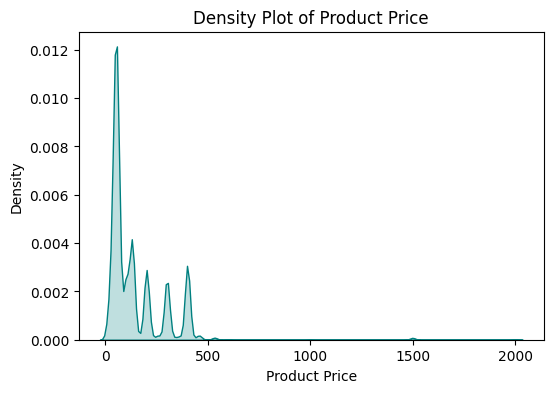

In [18]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data['Product Price'], fill=True, color='teal')  # use your numeric column here
plt.title('Density Plot of Product Price')
plt.xlabel('Product Price')
plt.ylabel('Density')
plt.show()

In [31]:
cols_to_keep = num_cols.tolist() + cat_low_cardinality
filtered_data = data[cols_to_keep]
filtered_data.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Customer Country,Customer Email,Customer Password,Customer Segment,Customer State,Department Name,Market,Order Region,Order Status,Shipping Mode
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,Southeast Asia,COMPLETE,Standard Class
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,South Asia,PENDING,Standard Class
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,EE. UU.,XXXXXXXXX,XXXXXXXXX,Consumer,CA,Fitness,Pacific Asia,South Asia,CLOSED,Standard Class
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,EE. UU.,XXXXXXXXX,XXXXXXXXX,Home Office,CA,Fitness,Pacific Asia,Oceania,COMPLETE,Standard Class
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Corporate,PR,Fitness,Pacific Asia,Oceania,PENDING_PAYMENT,Standard Class


In [32]:
dropped_cols = [col for col in data.columns if col not in cols_to_keep]
dropped_cols


['Category Name',
 'Customer City',
 'Customer Fname',
 'Customer Lname',
 'Customer Street',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order State',
 'Product Image',
 'Product Name',
 'shipping date (DateOrders)']

In [33]:
filtered_data_encoded = pd.get_dummies(filtered_data, columns=cat_low_cardinality)
filtered_data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,False,False,False,False,False,False,False,False,False,True
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,False,False,True,False,False,False,False,False,False,True
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,False,False,False,False,False,False,False,False,False,True
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,False,False,False,False,False,False,False,False,False,True
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,False,False,False,True,False,False,False,False,False,True


In [34]:
X = filtered_data_encoded.drop('Late_delivery_risk', axis=1)
y = filtered_data_encoded['Late_delivery_risk']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
filtered_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_imputed, y_train)
y_pred_lr = model_lr.predict(X_test_imputed)


In [49]:
y_pred_train = model_lr.predict(X_train_imputed)
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy_train = accuracy_score(y_train,y_pred_train)
print(f"Accuracy test: {accuracy}")
print(f"Accuracy Train:{accuracy_train}")


Accuracy test: 0.5483325947263461
Accuracy Train:0.5482809957414396


In [43]:
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     16307
           1       0.55      1.00      0.71     19797

    accuracy                           0.55     36104
   macro avg       0.27      0.50      0.35     36104
weighted avg       0.30      0.55      0.39     36104



In [44]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[    0 16307]
 [    0 19797]]


In [47]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_lr, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.54831562 0.54824637 0.54807326 0.548281   0.55343974]


In [53]:
# The error `ValueError: Length of values (140) does not match length of index (141)`
# indicates that the number of coefficients in model_lr.coef_[0] (140) does not match
# the number of columns in X_train.columns (141).
# This often happens when the Logistic Regression model implicitly drops a constant feature.
# From earlier analysis, 'Product Status' is a constant column (all zeros).
# We need to remove this column from the index used to create the Series to align the lengths.

corrected_index = X_train.columns

# Check for 'Product Status' and remove it if it causes the length mismatch
if 'Product Status' in X_train.columns and len(X_train.columns.drop('Product Status')) == len(model_lr.coef_[0]):
    corrected_index = X_train.columns.drop('Product Status')
elif 'Product Description' in X_train.columns and len(X_train.columns.drop('Product Description')) == len(model_lr.coef_[0]):
    # In case 'Product Description' (after imputation becoming constant) was the one dropped.
    corrected_index = X_train.columns.drop('Product Description')

# If after attempting to remove known constant columns the length still doesn't match,
# print a warning and proceed with the mismatched index (which will raise the original error)
# or handle it gracefully.
if len(corrected_index) == len(model_lr.coef_[0]):
    feature_importances = pd.Series(model_lr.coef_[0], index=corrected_index)
    print(feature_importances.sort_values(ascending=False))
else:
    print("Error: Could not align feature importances with X_train.columns. Length mismatch remains.")
    print(f"Length of coefficients: {len(model_lr.coef_[0])}")
    print(f"Length of X_train.columns: {len(X_train.columns)}")
    # Re-raise the original error or handle it as appropriate if the lengths still don't match
    raise ValueError("Length of values does not match length of index after attempted correction.")


Days for shipping (real)            0.000627
Delivery Status_Late delivery       0.000472
Sales                               0.000143
Shipping Mode_First Class           0.000120
Order Item Total                    0.000092
                                      ...   
Delivery Status_Shipping on time   -0.000185
Shipping Mode_Standard Class       -0.000189
Longitude                          -0.000207
Delivery Status_Advance shipping   -0.000239
Days for shipment (scheduled)      -0.000472
Length: 140, dtype: float64


In [54]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_imputed, y_train)
y_pred_rf = model_rf.predict(X_test_imputed)


In [55]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [56]:
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16307
           1       1.00      1.00      1.00     19797

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [57]:
conf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf)

Confusion Matrix:
 [[16307     0]
 [    0 19797]]
